In [ ]:
# 필요한 모듈 import
import requests as req
from bs4 import BeautifulSoup as bs

In [ ]:
# url 만들기
base_url = 'https://www.jobkorea.co.kr/Search/?stext=%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D&focusTab=&focusGno=43641436&tabType=recruit&Page_No='

page_no = 1

url = f'{base_url}{page_no}'

url

In [ ]:
resp = req.get(url)

# print(resp.text)
bs(resp.content, 'html.parser')

In [ ]:
headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36"}

resp=req.get(url, headers=headers)

resp.text

soup = bs(resp.text, 'html.parser')

soup


In [ ]:
# 요구 경력 조회
exp_tags = soup.select('span.exp')

exp_list = []

for tag in exp_tags :
  exp_list.append(tag.text)

exp_list

# 요구 학력 조회
edu_tags = soup.select('span.edu')

edu_tags

edu_list = []

for tag in edu_tags :
  edu_list.append(tag.text)

edu_list


In [20]:

# 함수화 시키기
def getExp(soup) :
  exp_tags = soup.select('span.exp')
  exp_list = []

  for tag in exp_tags :
    exp_list.append(tag.text)

  return exp_list

getExp(soup)

def getEdu(soup) :
  edu_tags = soup.select('span.edu')
  edu_list = []

  for tag in edu_tags :
    edu_list.append(tag.text)

  return edu_list

getEdu(soup)

['학력무관',
 '대졸↑',
 '학력무관',
 '학력무관',
 '대졸↑',
 '초대졸↑',
 '대졸↑',
 '대졸↑',
 '학력무관',
 '대졸↑',
 '학력무관',
 '대졸↑',
 '대졸↑',
 '학력무관',
 '학력무관',
 '학력무관',
 '대졸↑',
 '대졸↑',
 '고졸↑',
 '초대졸↑',
 '학력무관',
 '초대졸↑',
 '초대졸↑',
 '학력무관',
 '학력무관',
 '학력무관',
 '초대졸↑']

In [30]:
import math

83/20
math.ceil(83/20)

total_string = soup.select('.dev_tot')[0].text

total_string

# replace() : 특정 문자를 내가 원하는 문자로 변경해준다.
total_string = total_string.replace(',', '')

total_page = math.ceil( int(total_string) / 20 )

total_page

544

In [31]:
# 함수화 시키기
def getTotalPage(soup):
  total_string = soup.select('.dev_tot')[0].text
  total_string = total_string.replace(',', '')
  total_page = math.ceil( int(total_string) / 20 )

  return total_page

getTotalPage(soup)

544

In [32]:
# 필요한 모듈 import
import requests as req
from bs4 import BeautifulSoup as bs
import math

# 경력 조회 함수
def getExp(soup) :
  exp_tags = soup.select('span.exp')
  exp_list = []

  for tag in exp_tags :
    exp_list.append(tag.text)

  return exp_list

# 학력 조회 함수
def getEdu(soup) :
  edu_tags = soup.select('span.edu')
  edu_list = []

  for tag in edu_tags :
    edu_list.append(tag.text)

  return edu_list

# 전체 페이지 조회 함수
def getTotalPage(soup):
  total_string = soup.select('.dev_tot')[0].text
  total_string = total_string.replace(',', '')
  total_page = math.ceil( int(total_string) / 20 )

  return total_page

# 기타 준비물
base_url = 'https://www.jobkorea.co.kr/Search/?stext=%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D&focusTab=&focusGno=43641436&tabType=recruit&Page_No='

page_no = 1

url = f'{base_url}{page_no}'
headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36"}


In [36]:

# 요청 보내기
resp = req.get(url, headers=headers)
html = resp.text

soup = bs(html, 'html.parser')

# 전체 페이지 수 가져오기
total_page = getTotalPage(soup)
# total_page

# 전체 페이지 크롤링

# 전체 페이지 데이터를 담을 리스트 생성
edu_results = []
exp_results = []

# for page in range(total_page): 
for page in range(10) :
  url = f'{base_url}{page_no}'

  resp = req.get(url, headers=headers)
  html = resp.text

  soup = bs(html, 'html.parser')
  edu_list = getEdu(soup)
  exp_list = getExp(soup)

  edu_results += edu_list
  exp_results += exp_list
  page_no += 1


In [40]:
edu_results
len(edu_results)

len(exp_results)

300

In [45]:
import pandas as pd

# 요구 학력을 시리즈 객체로 변환
s_edu = pd.Series(edu_results)

# 요구 경력을 시리즈 객체로 변환
s_exp = pd.Series(exp_results)

# 시리즈 객체가 지원하는 value_counts() 를 사용하여
# 각 항목이 몇 번 등장했는지 구한다.
count_edu = s_edu.value_counts()

count_exp = s_exp.value_counts()

type(count_exp) # ** 결과는 시리즈 객체이다.

pandas.core.series.Series

In [56]:
# 요구 학력 시리즈 객체를 데이터 프레임으로 변경
# reset_index()는 기존의 인덱스를 하나의 칼럼으로 변경하여 df으로 반환한다.
df_edu = count_edu.reset_index()

# 변환된 데이터 프레임의 칼럼명을 수정한다.
df_edu.columns = ['요구 학력', '집계']

df_edu

# 요구 경력
df_exp = count_exp.reset_index()

df_exp.columns = ['요구 경력', '집계']

df_exp

# df 객체를 csv로 저장한다.
df_exp.to_csv('exp.csv', index=False)
df_edu.to_csv('edu.csv', index=False)

In [63]:
import matplotlib.pyplot as plt

df_edu = pd.read_csv('edu.csv')
df_edu

df_exp = pd.read_csv('exp.csv')
df_exp

# 정렬하기
# ignore_index=True : 기존 인덱스를 무시하고 새로운 인덱스 부여
# inplace=True : 원본 데이터를 수정
df_exp.sort_values(by='요구 경력', ignore_index=True, inplace=True)


df_edu = pd.read_csv('edu.csv')
df_edu.sort_values(by='요구 학력', ignore_index=True, inplace=True)



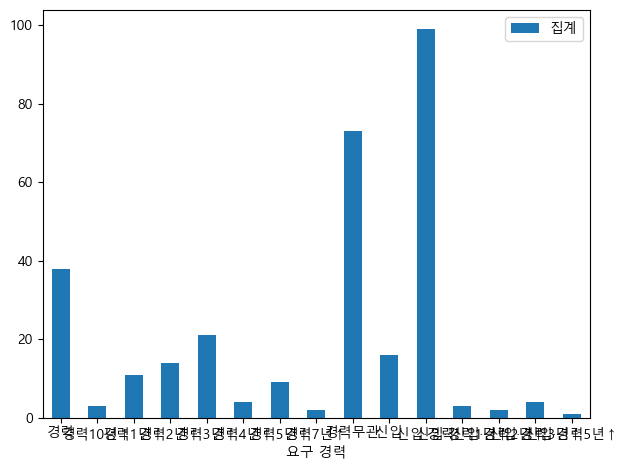

In [70]:
# matplotlib 은 기본적으로 한글을 못 읽는다.
# df_exp.plot(kind='bar', x='요구 경력', y='집계')


# 한글 폰트 적용하기
from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

df_exp.plot(kind='bar', x='요구 경력', y='집계')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


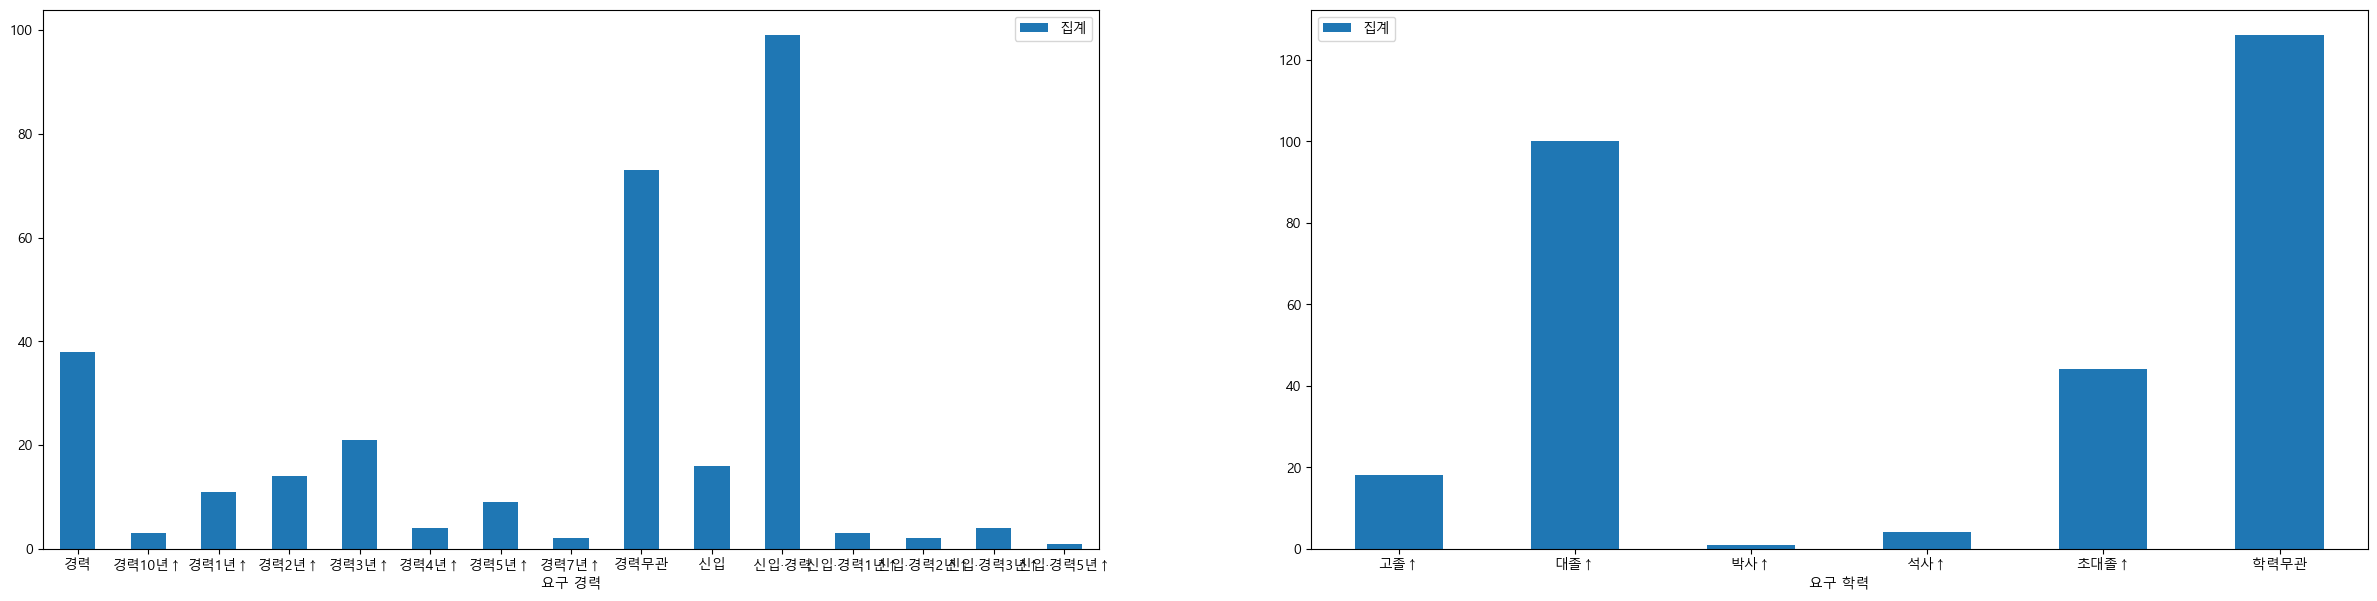

In [81]:
figure =plt.figure(figsize=(30,7))

ax1 = figure.add_subplot(1,2,1)
ax2 = figure.add_subplot(1,2,2)

df_exp.plot(kind='bar', x='요구 경력', y='집계', ax=ax1)
df_edu.plot(kind='bar', x='요구 학력', y='집계', ax=ax2)

ax1.tick_params(axis='x', rotation=0)
ax2.tick_params(axis='x', rotation=0)

plt.savefig('my_graph.png')

plt.show()
